# Testing the experiment classes


In [6]:
# from common.experiment import KubemlExperiment, History, TrainOptions, TrainRequest
import pandas as pd
import glob
import numpy as np
import pickle
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import transforms

## Merge experiments

Get the small dataframes of each experiment and merge them onto a single dataframe

In [ ]:
import glob
from typing import List

files = glob.glob('./tests/resnet34/*.pkl')

dataframes: List[pd.DataFrame] = []




for f in files:
    _d = pd.read_pickle(f)
    dataframes.append(_d)

d = pd.concat(dataframes, ignore_index=True)

d

d.to_pickle('resnet_36exp.pkl')

In [ ]:
d.sort_values('epoch_duration', ascending=False)

In [ ]:
pd.read_pickle('./resnet_complete.pkl')


In [ ]:

### Cifar100 dataset

In [ ]:

summary(r, input_size=(128, 3, 32, 32))

In [ ]:
r

In [ ]:
from torchvision.models.vgg import vgg11

v = vgg11()
v

In [ ]:
from torch import nn

class LeNet(nn.Module):
    """ Definition of the LeNet network as per the 1998 paper

    Credits to https://github.com/ChawDoe/LeNet5-MNIST-PyTorch for the
    convenience of the network definition and the train loop found there
    """

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y

In [ ]:
n = LeNet()
summary(n, input_size=(32, 1, 28, 28))

# Load the dataset

In [3]:
train, labels = np.load('./datasets/cifar10/cifar10_x_train.npy'), np.load('./datasets/cifar10/cifar10_y_train.npy')

In [55]:
normalize = transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_transf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
#     transforms.RandomCrop(32, 4),
    transforms.ToTensor(),
    normalize
])

val_transf = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

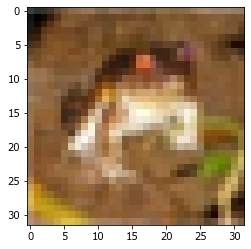

In [8]:
plt.imshow(train[0].squeeze())

In [48]:
transforms.ToPILImage()

ToPILImage()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


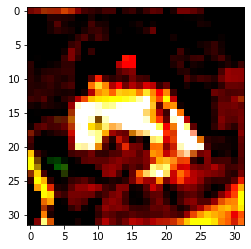

In [56]:
out = train_transf(train[0])
o = out.numpy()

plt.imshow(o.transpose(1,2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


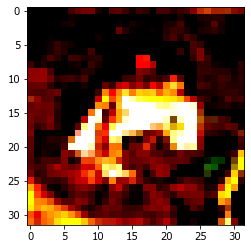

In [57]:
out2 = val_transf(train[0])
o = out2.numpy()

plt.imshow(o.transpose(1,2, 0))